<a href="https://colab.research.google.com/github/nickmedvedev/mybots/blob/main/Official_Final_Notebook_Nikolai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Nature of Light

Light has always fascinated humans, from its mesmerizing sunsets to the glow of a simple candle. To truly understand the magic of holography, we must first delve into the mysterious nature of light.

#Wave-Particle Duality

Light exhibits a unique characteristic: it behaves both as a wave and as a particle. This duality is one of the cornerstones of quantum mechanics.

#Particle Nature:
As particles, light can be thought of as tiny packets of energy called "photons". This nature explains phenomena like the photoelectric effect, where light can eject electrons from a material.

#Wave Nature:
As waves, light can be described in terms of amplitude, frequency, and wavelength. This wave-like behavior is evident in phenomena such as interference and diffraction.

An essential aspect of light's wave nature is its frequency, which is given by
(2π) / λ , where λ is the wavelength. The term (2π) / λ is referred to as the wave vector, denoted by K. The frequency of light changes depending on its color. For instance, red light, with a typical wavelength of 800 nm, has a different frequency than blue or green light.

To visualize this, let's create a simple sine wave to represent light's wave nature.

Interactive Wave Visualization

Using Python, we can dynamically visualize how the amplitude and frequency of a wave affect its shape:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual

# Calculating the frequency for red light with wavelength of 800 nm
red_light_frequency = 2 * np.pi / (800 * 10**-9)

def refined_plot_wave_v9(amplitude=1.0, wavelength=800):
    x = np.linspace(0, 10**-5, 50000)  # Generate x-values from 0 to 1000 nanometers
    y = amplitude * np.sin(2*np.pi / (wavelength * 10**(-9)) * x)  # Compute the sine wave

    plt.figure(figsize=(14, 6))
    plt.plot(x, y, lw=2, color='red')
    plt.ylim(-5, 5)
    plt.title(f"Sine Wave: Amplitude = {amplitude}, Wavelength = {wavelength:.2e} Nm")
    plt.xlabel('X (in meters)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Use the narrowed frequency range for exploration around the red light frequency
interact(refined_plot_wave_v9, amplitude=(0.1, 5.0), wavelength=(400, 800));











interactive(children=(FloatSlider(value=1.0, description='amplitude', max=5.0, min=0.1), IntSlider(value=800, …

Next, let's delve deeper into the superposition and interference, which forms the foundation for understanding holography.

Superposition and Interference

One of the most intriguing phenomena associated with the wave nature of light is interference. When two or more waves meet, they combine to form a new wave. This principle is known as superposition.

Constructive and Destructive Interference
When waves combine, they can either reinforce each other or cancel each other out, depending on their phase.

Constructive Interference: Occurs when waves combine to produce a wave with larger amplitude. This happens when the crest of one wave aligns with the crest of another.
Destructive Interference: Occurs when waves combine to produce a wave with reduced or zero amplitude. This happens when the crest of one wave aligns with the trough of another.
Visualizing Interference
Let's visualize these two types of interference using Python:

In [2]:
def plot_interference(type_of_interference='Constructive'):
    x = np.linspace(0, 4 * np.pi, 1000)

    if type_of_interference == 'Constructive':
        y1 = np.sin(x)
        y2 = np.sin(x)
        resultant_wave = y1 + y2
    else:
        y1 = np.sin(x)
        y2 = -np.sin(x)
        resultant_wave = y1 + y2

    plt.figure(figsize=(12, 6))
    plt.plot(x, y1, 'b', label="Wave 1", lw=1.5)
    plt.plot(x, y2, 'g', label="Wave 2", lw=1.5)
    plt.plot(x, resultant_wave, 'r', label="Resultant Wave", lw=2)

    plt.title(f"{type_of_interference} Interference")
    plt.xlabel('X')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.ylim(-2.5, 2.5)
    plt.show()

interact(plot_interference, type_of_interference=['Constructive', 'Destructive']);


interactive(children=(Dropdown(description='type_of_interference', options=('Constructive', 'Destructive'), va…

Interference is the fundamental principle behind holography. When light from an object interferes with a reference beam, it creates a pattern that encodes 3D information about the object. This interference pattern is what we capture to produce a hologram.

As a result, we set the stage for the next module, where we'll contrast photography with holography and dive into how 3D information is encoded in holograms.

#Holography: A New Dimension
Traditional photography captures and records the intensity of light, which corresponds to the amplitude squared of the electric field. This records only the real part (magnitude) of the light, effectively a 2D projection of a scene.

Holography, on the other hand, records both the amplitude and phase of the light. This is akin to capturing the entire light field, enabling the reconstruction of a 3D scene.

#Photography vs. Holography

In the realm of light:

Intensity (I): Defined as the square of the amplitude of the electric field
E, represented as I = |E|^2.

Electric Field (E): A complex number defined as Amplitude×e^(i×phase). For our purposes:
- The amplitude can be visualized as a 2D matrix with specific values.
- The phase can also be represented as a 2D matrix.

When we capture a 2D photograph using incoherent light, like from a lamp, we record only the intensity (a real number) of the light. This is evident in the first visualization.

In contrast, holography, using coherent light like from a laser, records both the real and imaginary parts. This is showcased in the second and third visualizations, where we capture the amplitude and phase of a coherent Gaussian beam.

# Visualizations:

- 2D Photograph - Intensity: Represents the intensity of the Gaussian beam produced with incoherent light.
- 3D Photograph - Amplitude: Depicts the amplitude of the Gaussian beam when illuminated by a coherent light source.
- 3D Photograph - Phase: Demonstrates the phase of the Gaussian beam, visualized as concentric circles, capturing the spatial distribution and interference patterns crucial for holographic reconstruction.

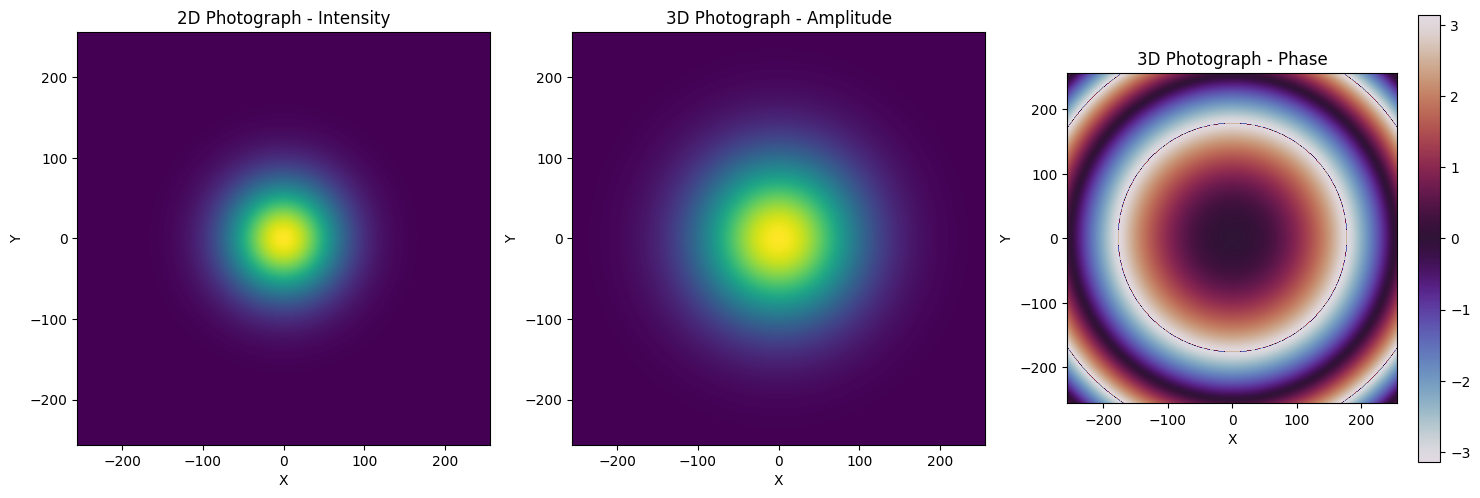

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
E0 = 1       # Peak amplitude
w = 100      # Beam waist
x = np.linspace(-256, 256, 512)
y = np.linspace(-256, 256, 512)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

# Define Gaussian beam
E = E0 * np.exp(-R**2 / w**2)
I = np.abs(E)**2  # Intensity for 2D photograph

# Define phase for holography - concentric circles
phase = np.angle(E0 * np.exp(1j * (R/w)**2))

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# 2D photograph - Intensity of Gaussian beam (incoherent light)
axes[0].imshow(I, cmap='viridis', extent=[-256,256,-256,256])
axes[0].set_title("2D Photograph - Intensity")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")

# 3D photograph - Amplitude of Gaussian beam (coherent light)
axes[1].imshow(np.abs(E), cmap='viridis', extent=[-256,256,-256,256])
axes[1].set_title("3D Photograph - Amplitude")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")

# 3D photograph - Phase of Gaussian beam (coherent light)
c = axes[2].imshow(phase, cmap='twilight', extent=[-256,256,-256,256])
axes[2].set_title("3D Photograph - Phase")
axes[2].set_xlabel("X")
axes[2].set_ylabel("Y")

# Adjust layout and show
fig.colorbar(c, ax=axes[2], orientation='vertical')
fig.tight_layout()
plt.show()


The ability to capture both amplitude and phase in holography is what gives it the unique capability to reconstruct 3D scenes. When a hologram is illuminated with a coherent light source, the interference patterns recorded in the phase allow for a three-dimensional reconstruction of the original object. This is different from a 2D photograph where depth information is lost.

Furthermore, the concentric circles in the phase visualization represent the interference pattern. The denser regions correspond to areas of higher interference, while the more spread out regions signify lesser interference. Understanding these patterns is pivotal in the realm of holography, as it aids in decoding the depth and positional information of the original scene.

Remember, while traditional photography gives us a flat representation, holography offers a window into the depth and richness of the scene, making it a revolutionary tool in imaging and visualization.

#Depth and Parallax in Holography
One of the unique features of a hologram is its ability to showcase depth and parallax. Parallax refers to the apparent shift in the position of an object when viewed from different angles. In holography, this effect is pronounced, allowing for a lifelike 3D representation.

#Visualizing Depth and Parallax

To demonstrate depth and parallax, we'll simulate a scene with a 3D pyramid. As we change our viewing angle, the relative positions of this object will shift, highlighting the parallax effect:

In [3]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_3D_pyramid(viewing_angle=0):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Define the pyramid's vertices
    vertices = np.array([[0, 0, 0],  # Base corner 1
                         [1, 0, 0],  # Base corner 2
                         [0.5, 0.5, 0],  # Base center
                         [0.5, 0.5, 1]])  # Apex

    # Define the pyramid's face indices
    faces_indices = [[0, 1, 3],
                     [0, 2, 3],
                     [1, 2, 3],
                     [0, 1, 2]]

    # Rotate the pyramid based on the viewing angle
    cos_angle = np.cos(np.radians(viewing_angle))
    sin_angle = np.sin(np.radians(viewing_angle))

    rotated_vertices = []
    for vertex in vertices:
        x_rot = vertex[0]
        y_rot = vertex[1] * cos_angle - vertex[2] * sin_angle
        z_rot = vertex[1] * sin_angle + vertex[2] * cos_angle
        rotated_vertices.append([x_rot, y_rot, z_rot])
    rotated_vertices = np.array(rotated_vertices)

    # Plot the rotated pyramid
    for face_index in faces_indices:
        triangle = [rotated_vertices[i] for i in face_index]
        ax.add_collection3d(Poly3DCollection([triangle], color=np.random.rand(3,)))

    ax.set_title(f"Viewing Angle: {viewing_angle} degrees")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(0, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(0, 1.5)

    plt.show()

from ipywidgets import interact
interact(plot_3D_pyramid, viewing_angle=(0, 360, 10));



interactive(children=(IntSlider(value=0, description='viewing_angle', max=360, step=10), Output()), _dom_class…

This visualization underscores the depth and parallax inherent in holography, making it a powerful medium for 3D representation.

Up next, we'll dive into the core of holography: crafting a hologram by understanding the role of beams and interference patterns.

#Crafting a Hologram
Holography distinguishes itself from photography in the way it captures and reproduces light. Central to a hologram is the interference pattern, which arises from the interplay between two light beams: the reference beam and the object beam.

#The Role of Beams

- Reference Beam:
 - This is a coherent beam of light, often from a laser, that does not interact with the object. Its fundamental purpose is to interfere with the object beam, leading to the generation of an interference pattern.
- Object Beam:
 - This beam illuminates the object. During its interaction with the object, the light scatters, encoding the object's depth, shape, and texture into the beam.
When these two beams converge on a holographic plate or film, they create an interference pattern that contains the 3D details of the object.

#Visualizing the Interaction

To grasp this concept better, we'll visualize the beams' interaction and observe the resulting interference pattern:

In [4]:
def plot_beam_interference(reference_amplitude=1.0, object_amplitude=1.0, object_phase=0):
    x = np.linspace(0, 4 * np.pi, 1000)

    # Defining the reference and object beams as sine waves
    reference_wave = reference_amplitude * np.sin(x)
    object_wave = object_amplitude * np.sin(x + object_phase)  # Introducing a variable phase shift for the object wave

    # The interference pattern is the squared magnitude of the sum of the two waves
    interference_pattern = np.abs(reference_wave + object_wave)**2

    plt.figure(figsize=(14, 6))
    plt.plot(x, reference_wave, 'b', label="Reference Beam", lw=1.5)
    plt.plot(x, object_wave, 'g', label="Object Beam", lw=1.5)
    plt.plot(x, interference_pattern, 'r', label="Interference Pattern", lw=2)

    plt.title("Interaction of Reference and Object Beams")
    plt.xlabel('X')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.ylim(-3, 3)
    plt.show()

from ipywidgets import interact
interact(plot_beam_interference, reference_amplitude=(0.1, 2.0), object_amplitude=(0.1, 2.0), object_phase=(0, 2*np.pi, 0.1));


interactive(children=(FloatSlider(value=1.0, description='reference_amplitude', max=2.0, min=0.1), FloatSlider…

The red wave in the visualization represents the interference pattern. This pattern, when recorded on a suitable medium, becomes our hologram.

# Interference Patterns: Decoding 3D Information

At a microscopic level, interference patterns are composed of intricate fringes. Each of these fringes holds a fragment of 3D information about an object. When these patterns are illuminated with an appropriate light source (preferably the same one used during recording), the fringes diffract the light in such a way that they can reconstruct the original object's 3D image.

# Visualizing the Interference Fringes

To gain a better understanding, let's simulate and visualize how a small section of this interference pattern might appear.

In the given simulation, both the reference and object beams are modeled as sine waves. The frequency of these waves has been increased to display more fringes in the visualization. The interference pattern is then derived by summing these two waves, taking the absolute value of this sum, and subsequently squaring the result. This creates a visual representation of the combined effects of the reference and object beams.

When you interact with the simulation, consider the following parameters:

- Reference Amplitude: Adjusts the amplitude of the reference wave.
- Object Amplitude: Adjusts the amplitude of the object wave.
- Object Phase: Modifies the phase of the object wave.
- Lambda Object: Alters the wavelength of the object wave.

The parameter K_object is computed based on the chosen wavelength, adjusting the wave to fall between the ranges of Red and Blue light.

In [5]:
from ipywidgets import interact

def plot_fringes(reference_amplitude=1.0, object_amplitude=1.0, object_phase=np.pi/4, lambda_object=800):
    x = np.linspace(0, 10**-5, 1000)

    # Simulating the reference and object beams as sine waves with increased frequency for more fringes
    reference_wave = reference_amplitude * np.sin(2*np.pi/(800*10**(-9))*x)
    K_object = 2*np.pi/(lambda_object*10**(-9))
    object_wave = object_amplitude * np.sin(K_object * x + object_phase)

    # The interference pattern is the squared magnitude of the sum of the two waves
    interference_pattern = (np.abs(reference_wave + object_wave))**2

    plt.figure(figsize=(14, 4))
    plt.plot(x, interference_pattern, 'r', lw=2)

    plt.title("Interference Fringes")
    plt.xlabel('X in meters')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.ylim(0, 4)  # Adjusted y limits for a better view
    plt.show()

interact(plot_fringes, object_phase=(0, 2*np.pi), lambda_object=(400, 800), reference_amplitude=(0.1, 2.0), object_amplitude=(0.1, 2.0));

# Note: The range of K_object is adjusted to represent wavelengths between Red and Blue light.
# In real-life scenarios, the same wavelength is commonly used for both reference and object waves for best results.


interactive(children=(FloatSlider(value=1.0, description='reference_amplitude', max=2.0, min=0.1), FloatSlider…

- Interference Mechanism: The interference fringes are a direct result of the interaction between the reference wave and the object wave. The peaks and troughs of the patterns denote areas of constructive and destructive interference, respectively.
- Wavelength Consistency: In real-world applications, it's beneficial to use the same wavelength for both recording and reconstruction. This ensures that the interference patterns are accurately decoded, leading to a faithful 3D reconstruction of the original object.
- Fringe Density: The density of fringes (how closely packed they are) can give insights into the depth and contour details of the original object. A higher density implies more detailed 3D information.
- Decoding Depth: The visualization offers a glimpse into how interference patterns can encode depth information. By adjusting parameters, one can observe how different object depths or contours might manifest in the interference pattern.

In essence, holography and the study of interference patterns provide a gateway to understanding and visualizing objects in three dimensions, adding depth to our perception.
As we set the foundation for understanding how a hologram is crafted. Let's now explore how to decode one too.

#Decoding the Hologram

After recording a hologram, the subsequent step is to reconstruct or 'decode' the original 3D image from it. This process requires illuminating the hologram with a coherent light source, often the same type used during the recording phase.

#Illumination and Reconstruction
Upon illuminating the hologram, the interference fringes diffract the incoming light in a specific pattern. This diffracted light replicates the original object beam, thereby reconstructing the 3D image of the object.

#Visualizing the Reconstruction
To understand this concept more concretely, let's simulate the reconstruction process. The interference pattern on the holographic plate is a result of the interaction between the object wave and the reference wave. This pattern remains static once recorded. However, during the reconstruction process, this static interference pattern interacts with a playback wave to reproduce the original scene.

The interference pattern can be visualized as:

interference_pattern = (object_wave+reference_wave)^2


When illuminating the interference pattern with a playback wave, it modulates the pattern to produce a reconstructed wave. The playback wave is defined as:

playback_wave = Amplitude * sin(K_p * X + Phase_p)

Where:
- K_p is a constant that determines the frequency of the playback wave.
- X is the spatial variable.
- Phase_p is the phase of the playback wave.

The amplitude of the playback wave directly influences the intensity of the reconstructed wave. As the amplitude increases, the intensity of the reconstructed wave (which is the square of its amplitude) also increases.

By adjusting the amplitude and phase of the playback wave, one can observe different reconstructed patterns. Notably, when the playback wave matches the reference wave in amplitude and phase, the reconstructed wave appears as a clear, periodic pattern, closely resembling the original object wave.





In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_reconstruction(playback_amplitude=1.0, playback_phase=np.pi/4):
    # Define the spatial range
    x = np.linspace(0, 10 * np.pi, 1000)

    # Create a reference wave and an object wave as simple sine waves
    reference_wave = np.sin(x)
    object_wave = np.sin(2 * x + np.pi/5)  # Slightly different frequency and phase for object wave

    # Compute the interference pattern
    interference_pattern = (reference_wave + object_wave)**2

    # Compute the playback wave
    K_p = 2  # Chosen for visualization purposes
    playback_wave = playback_amplitude * np.sin(K_p * x + playback_phase)

    # Compute the reconstructed wave
    reconstructed_wave = interference_pattern * playback_wave

    plt.figure(figsize=(14, 8))

    # Plot the interference pattern
    plt.subplot(2, 1, 1)
    plt.title("Interference Pattern")
    plt.plot(x, interference_pattern, 'b')
    plt.grid(True)
    plt.ylim(0, 4)  # Set consistent y-limits for better comparison

    # Plot the reconstructed wave with playback illumination
    plt.subplot(2, 1, 2)
    plt.title("Reconstructed Wave with Playback Illumination")
    plt.plot(x, reconstructed_wave, 'r')
    plt.grid(True)
    plt.ylim(-4, 4)  # Set consistent y-limits for better comparison

    plt.xlabel('X')
    plt.tight_layout()
    plt.show()

from ipywidgets import interact

interact(plot_reconstruction,
         playback_amplitude=(0.1, 3.0, 0.1),
         playback_phase=(0, 2*np.pi, np.pi/8))



interactive(children=(FloatSlider(value=1.0, description='playback_amplitude', max=3.0, min=0.1), FloatSlider(…

<function __main__.plot_reconstruction(playback_amplitude=1.0, playback_phase=0.7853981633974483)>

The interactive visualization provides a tangible understanding of the reconstruction process in holography. As we adjust the playback wave's amplitude and phase, the reconstructed wave's form and intensity change, offering insights into the decoding of the original 3D image from the interference pattern.

A few key takeaways:

- Interference Pattern: This static pattern is crucial as it encodes the 3D information of the original object. It remains unchanged during the reconstruction process.
- Playback Wave's Influence: The playback wave's properties, especially its amplitude, play a pivotal role in the clarity and intensity of the reconstructed image. A matching playback wave (similar to the original reference wave) yields the clearest reconstruction.
- Flexibility of Holography: The ability to adjust the playback wave and observe different reconstructed patterns showcases the flexibility and potential of holography as a technique to capture and reproduce 3D information.

In real-world applications, understanding these intricacies is vital for producing high-quality holographic reconstructions. Whether for artistic, scientific, or commercial purposes, mastering the interplay between the interference pattern and playback wave is central to successful holography.

#Diverse Faces of Holography

Holography has evolved tremendously over the years, resulting in the development of various kinds of holograms. Each type possesses unique characteristics and applications. In this section, we'll delve into the most common types and their distinguishing features.

#Types of Holograms

1. Transmission Holograms
 - Description: Transmission holograms produce images by transmitting a beam of light through the hologram. This type of hologram is prevalent since they can be mass-produced at a lower cost. Embossed holograms, such as those found on credit cards, are transmission holograms with a mirrored backing. When viewed, the resulting image appears virtual, located behind the hologram, and can be quite deep and three-dimensional.

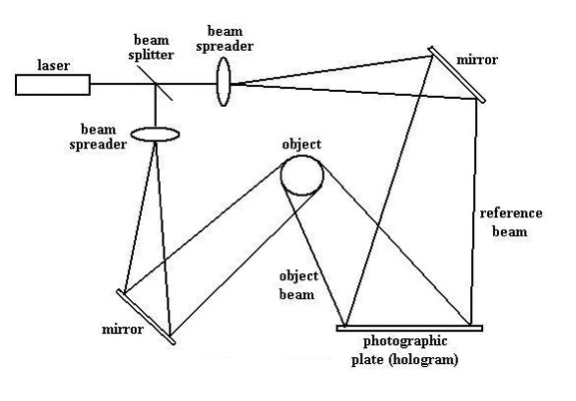

(a) Recording Transmission Holograms:

A highly coherent light source, typically a laser, is essential. After the object beam goes through the beam spreader, it reflects off a mirror and onto the object. The object beam then projects onto the photographic plate. Concurrently, the reference beam reflects off another mirror and shines on the photographic plate.

(b) Reconstructing Transmission Holograms:

A reconstruction beam illuminates the hologram, positioned at the angle identical to the reference beam during the recording phase. When aligned correctly, three beams pass through the hologram: an undiffracted beam (zeroth order) which doesn't produce an image, a primary (virtual) image beam, and a secondary (real) image beam. The viewer can see a virtual image of the object located behind the hologram if observed at the angle of the primary image beam. Conversely, observing the hologram at the angle of the secondary image beam reveals a real image of the object in front of the hologram.

2. Reflection Holograms

  - Description: Reflection holograms generate images by reflecting a beam of light off the hologram's surface. These holograms create high-quality images but can be more expensive to produce. The 3D image appears floating in front of the hologram.

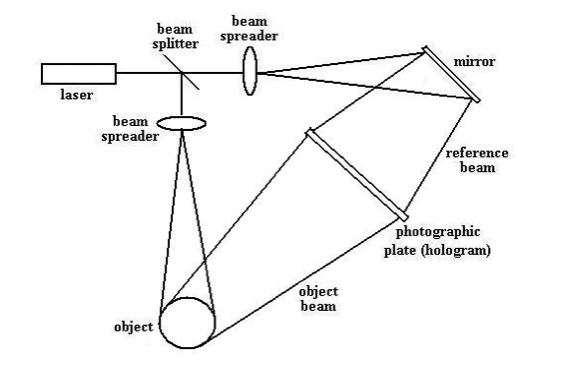

(a) Recording Reflection Holograms:

A laser is utilized for its highly coherent light. This beam encounters a beam splitter, dividing it into an object beam and a reference beam. The object beam, after widening via a beam spreader, reflects off the object, projecting onto the photographic plate. Simultaneously, the reference beam, also widened by a beam spreader, reflects off a mirror, shining onto the photographic plate.

(b) Reconstructing Reflection Holograms:

A reconstruction beam, positioned at the same angle as the illuminating beam during the recording phase, is used to reconstruct the object wavefront.
Rainbow Holograms
Description: These are a subtype of reflection holograms that separate light into its constituent colors, producing a mesmerizing rainbow effect. This type is often utilized for security purposes, such as on credit cards and product packaging.

# Applications in the Modern World

While many might associate holography with sci-fi movies and futuristic tech displays, it's a technology that has found practical applications in a wide range of industries today.

# 1. Security and Anti-Counterfeiting

Holograms have become a staple in the security industry, particularly for anti-counterfeiting measures.

Credit Cards and Banknotes:
Holographic strips or patches on credit cards and banknotes are difficult to replicate, making counterfeiting challenging. Their shimmering, multi-colored appearance, which changes with the viewing angle, is a quick visual check for authenticity.

Passports and IDs:
Many countries have adopted holographic overlays on their passports and other critical IDs. These holograms can encode detailed information and can be designed to exhibit specific visual effects, adding an extra layer of security.

# 2. Medical Imaging

Holography can provide 3D visualizations of complex internal structures, offering potential advancements in medical diagnostics.

Holographic Microscopy:
By leveraging the principles of holography, microscopes can capture 3D images of microorganisms and cells, providing a depth-rich view of the subjects.

Endoscopy:
Holographic endoscopes can produce 3D images of internal body structures, potentially allowing for more precise medical procedures.

# 3. Art and Entertainment

Artists and entertainers have adopted holography to create immersive experiences.

Holographic Performances:
Late artists, like Tupac Shakur and Michael Jackson, have been "resurrected" on stage using holographic projections, creating memorable performances.

Holographic Art Installations:
Artists use holography to create dynamic, 3D installations that change based on the viewer's perspective, offering a unique, interactive experience.

Interactive Visualization: Holographic Data Storage
To delve deeper into the concept of holographic data storage, let's visualize how data can be stored in three dimensions.

# 4. Data Storage

The three-dimensional nature of holograms allows for a multi-layered data storage approach, increasing storage capacities.

#Introduction to Holographic Data Storage:
Holography, at its core, is a method of recording light patterns as interference fringes. This phenomenon is not just restricted to visual marvels like 3D images but has profound applications in the realm of data storage. Traditional data storage methods, whether they are optical (like DVDs) or magnetic (like hard drives), primarily utilize the surface of the medium for storage. However, holography harnesses the volume of the medium, allowing for multi-layered, depth-wise storage. This is where the Holographic Versatile Disc (HVD) comes into play.

#Visualizing Holographic Data Encoding:
The displayed slices above illustrate the interference patterns at various depths within a hypothetical holographic medium. While these specific patterns correspond to our test image (the cameraman), in a real HVD, such patterns would represent encoded data bits. Each slice can be thought of as a 'layer' of data. The ability to store data in such multi-layered fashion greatly augments the storage capacity, potentially accommodating terabytes of data in a disc not much larger than today's DVDs.

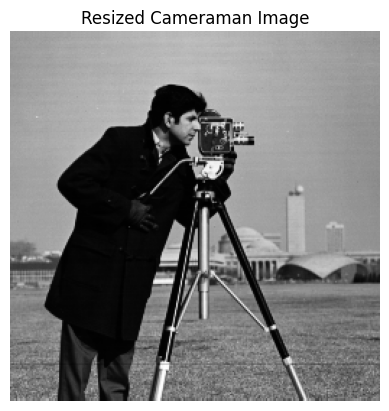

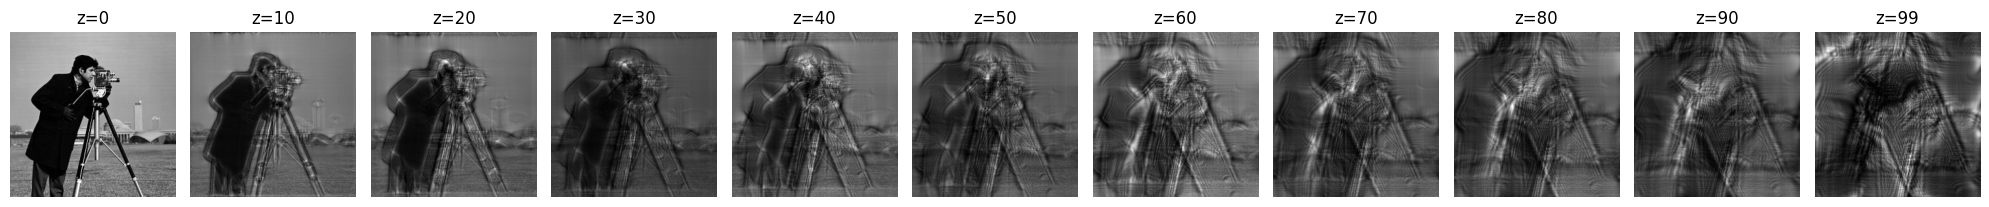

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Constants
lambda_ = 800e-9  # Wavelength in meters
k_ref = 2 * np.pi / lambda_  # Wave number
z_steps = 100  # Number of z slices for the hologram

# Create a 3D reference wave E_ref(x,y,z) propagating in the z-direction
A_ref = np.ones((256, 256))
Phase_ref = np.zeros((256, 256))
E_ref = np.zeros((256, 256, z_steps))

for i in range(z_steps):
    z = 1e-6 * i  # Incremental z steps in meters
    E_ref[:, :, i] = A_ref * np.sin(k_ref * z + Phase_ref)

# Load the cameraman image
import urllib.request

# Download the image from the URL
url = "https://camo.githubusercontent.com/80715e4d93a610e276de877a76deda966633ae8aeaf35a7b81cb0263b487237b/68747470733a2f2f7261772e6769746875622e636f6d2f616e74696d617474657231352f63616d6572616d616e2f6d61737465722f63616d6572616d616e2e706e67"
urllib.request.urlretrieve(url, "downloaded_image.jpg")

# Load the downloaded image
image = cv2.imread("downloaded_image.jpg", cv2.IMREAD_GRAYSCALE)


# Resize the image to 256x256 and normalize it to be between 0 and 1
cameraman = cv2.resize(image, (256, 256))
cameraman_normalized = cameraman / 255.0

# Display the resized cameraman image
plt.imshow(cameraman_normalized, cmap='gray')
plt.title("Resized Cameraman Image")
plt.axis('off')
plt.show()

def angular_spectrum_method(field, lambda_, z, dx):
    """
    Propagate the given field using the Angular Spectrum Method.

    Parameters:
    - field: 2D input field to propagate
    - lambda_: wavelength of the light
    - z: distance to propagate
    - dx: pixel size in spatial domain

    Returns:
    - Propagated field at distance z
    """
    # Calculate frequency coordinates in 2D
    nx, ny = field.shape
    fx = np.fft.fftfreq(nx, dx)
    fy = np.fft.fftfreq(ny, dx)
    FX, FY = np.meshgrid(fx, fy)

    # Calculate the squared wavenumber (k^2)
    k = 2 * np.pi / lambda_
    k_squared = k**2

    # Calculate the propagation kernel for the given z
    H = np.exp(1j * k * z * np.sqrt(1 - (lambda_ * FX)**2 - (lambda_ * FY)**2))
    H[np.isnan(H)] = 0

    # Move to frequency domain
    field_spectral = np.fft.fftshift(np.fft.fft2(field))

    # Multiply by the propagation kernel
    propagated_spectral = field_spectral * H

    # Move back to spatial domain
    propagated_field = np.fft.ifft2(np.fft.ifftshift(propagated_spectral))

    return propagated_field

# Propagate the object wave using ASM through the volume of the hologram
E_obj = np.zeros((256, 256, z_steps), dtype=complex)
for i in range(z_steps):
    z = 1e-6 * i  # Incremental z steps in meters
    E_obj[:, :, i] = angular_spectrum_method(np.sqrt(cameraman_normalized), lambda_, z, 1e-6)

# Calculate the intensity throughout the volume by summing the object and reference waves
I = np.abs(E_ref + E_obj)**2

# Select a range of z slices to visualize
slices_to_display = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]

# Plot these slices
fig, axes = plt.subplots(1, len(slices_to_display), figsize=(20, 4))

for ax, z_slice in zip(axes, slices_to_display):
    ax.imshow(I[:, :, z_slice], cmap='gray')
    ax.set_title(f"z={z_slice}")
    ax.axis('off')

plt.tight_layout()
plt.show()




Here are the visualized intensity slices at various depths within the volume hologram. As you move from left to right (from z=0 to z=99), you can observe the evolving interference patterns, representing the depth-wise encoding of the object's information.

Conclusion:

As the digital age progresses, the demand for efficient and expansive data storage solutions grows. Holographic data storage, exemplified by technologies like HVD, promises a leap forward. By moving beyond surface-based storage and utilizing the full volume of the medium, holography might just pave the way for the next generation of storage devices.

# Holography in Medical Imaging

One of the most promising applications of holography is in the field of medical imaging. The ability to create detailed 3D images can offer clinicians a more comprehensive view of structures, potentially leading to better diagnoses and treatment plans.

# Holographic Microscopy
Traditional microscopes provide a 2D view of samples, which can limit the information gained, especially for samples with intricate 3D structures. Holographic microscopes, on the other hand, can capture 3D images of microorganisms, cells, and other microscopic structures.

#Visualization: Comparing 2D and 3D Microscopy

Imagine viewing a multi-layered structure, like a cluster of cells. With traditional microscopy, you'd see a 2D projection, potentially missing out on the depth and arrangement of individual cells. With holographic microscopy, you'd see the 3D arrangement.

Let's visualize this:

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_microscopy_view(view_type='2D'):
    fig = plt.figure(figsize=(10, 6))

    if view_type == '2D':
        ax = fig.add_subplot(111)
        # Simulating a cluster of cells as circles
        circle1 = plt.Circle((0.5, 0.5), 0.4, color='blue', alpha=0.5)
        circle2 = plt.Circle((0.6, 0.6), 0.3, color='red', alpha=0.5)
        circle3 = plt.Circle((0.4, 0.4), 0.35, color='green', alpha=0.5)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(circle3)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_title('2D Microscopy View')
    else:
        ax = fig.add_subplot(111, projection='3d')
        # Simulating a cluster of cells as spheres in 3D space
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        x = 0.4 * np.outer(np.cos(u), np.sin(v)) + 0.5
        y = 0.4 * np.outer(np.sin(u), np.sin(v)) + 0.5
        z = 0.4 * np.outer(np.ones(np.size(u)), np.cos(v))
        ax.plot_surface(x, y, z, color='blue', alpha=0.5)
        x = 0.3 * np.outer(np.cos(u), np.sin(v)) + 0.6
        y = 0.3 * np.outer(np.sin(u), np.sin(v)) + 0.6
        z = 0.3 * np.outer(np.ones(np.size(u)), np.cos(v)) + 0.2
        ax.plot_surface(x, y, z, color='red', alpha=0.5)
        x = 0.35 * np.outer(np.cos(u), np.sin(v)) + 0.4
        y = 0.35 * np.outer(np.sin(u), np.sin(v)) + 0.4
        z = 0.35 * np.outer(np.ones(np.size(u)), np.cos(v)) - 0.2
        ax.plot_surface(x, y, z, color='green', alpha=0.5)
        ax.set_title('3D Holographic Microscopy View')

    plt.show()

from ipywidgets import interact
interact(plot_microscopy_view, view_type=['2D', '3D']);


interactive(children=(Dropdown(description='view_type', options=('2D', '3D'), value='2D'), Output()), _dom_cla…

In the 2D view, the overlaps between cells (represented by circles) might make it challenging to discern individual cell boundaries and relationships. In contrast, the 3D holographic view offers a clearer perspective on the spatial arrangement of the cells (represented by spheres).

# Holographic Endoscopy

Endoscopy involves inserting a camera into the body to inspect internal structures. Traditional endoscopy provides 2D images. However, holographic endoscopy can offer 3D views, providing surgeons with more context and potentially leading to more precise medical procedures.

#Visualization: Navigating a 3D Structure:
Imagine navigating through a branched structure, like the bronchi in the lungs. A 2D view might make it challenging to discern the depth and relationships between branches, while a 3D view offers a more comprehensive perspective.

Let's visualize navigating through such a structure:

In [9]:
def stable_endoscopy_view(depth=5):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Simulating a consistent main branched structure
    z = np.linspace(0, 10, 100)
    x = np.sin(z)
    y = np.cos(z)
    ax.plot(x, y, z, label='Main Branch', color='b')

    np.random.seed(42)  # Set seed for reproducibility
    # Adjusting branches based on depth
    for i in range(1, depth, 2):  # Every 2 units of depth
        z_branch = np.linspace(i, i+1.5, 50)
        x_branch = np.sin(z_branch) + 0.5 * (np.random.rand() - 0.5)
        y_branch = np.cos(z_branch) + 0.5 * (np.random.rand() - 0.5)
        ax.plot(x_branch, y_branch, z_branch, label=f'Branch at Depth {i}', linestyle='--')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Depth')
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([0, 10])
    ax.set_title('3D Holographic Endoscopy View')
    ax.legend()

    plt.show()

from ipywidgets import interact
interact(stable_endoscopy_view, depth=(1, 10, 1));


interactive(children=(IntSlider(value=5, description='depth', max=10, min=1), Output()), _dom_classes=('widget…

In this visualization, the main branch represents a primary passage, like a main bronchus in the lungs, while the smaller branches represent offshoots. With holographic endoscopy, doctors can gain a clearer perspective on the spatial arrangement and depth of these structures.

These visualizations offer a glimpse into how holography can revolutionize medical imaging. By providing more detailed and spatially accurate representations, holography can significantly enhance diagnostics and treatment procedures.

#The Future of Holography: Beyond the Visible

Holography, while already a transformative technology, is still in its nascent stages. As we refine our understanding and develop better tools, the applications of holography are set to grow and diversify.

#Augmented and Virtual Reality
Virtual and augmented reality (VR & AR) systems are increasingly incorporating holography. Traditional VR and AR visuals often lack depth, but with holography, users can experience truly three-dimensional visuals that interact with the environment in real-time.

#Interactive Visualization: Meta Quest 2 / Pro

Imagine wearing a pair of glasses, and instead of just seeing the world through them, you see a blend of the real world and holograms. META's Quest is one such VR/AR device as demonstrated by Nathan Matsuda, a research scientist at META. While the actual implementation involves extremely complex optics, let's provide a simple visualization of how a user might interact with holograms in a real-world setting:

In [ ]:
def final_corrected_hololens_view(show_hologram=False):
    plt.figure(figsize=(12, 7))

    # Simulating a real-world setting - a room with a window and a table
    plt.plot([0, 10, 10, 0, 0], [0, 0, 6, 6, 0], color='gray')  # Walls
    plt.plot([3, 7, 7, 3, 3], [1, 1, 2, 2, 1], color='brown')  # Table
    plt.text(5, 1.5, 'Table', horizontalalignment='center')

    # TV
    plt.plot([4, 6, 6, 4, 4], [4, 4, 5.5, 5.5, 4], color='blue')  # TV
    plt.text(5, 4.75, 'TV', color='black', horizontalalignment='center')

    if show_hologram:
        # Displaying a hologram of a vase on the table
        vase_x = [4.5, 5, 5.5, 5, 4.5]
        vase_y = [2.5, 3.5, 2.5, 2, 2.5]
        plt.plot(vase_x, vase_y, color='green', linestyle='--')
        plt.text(5, 3.7, 'Vase Hologram', color='green', horizontalalignment='center')

        # Displaying a holographic painting on the wall
        plt.plot([1, 3, 3, 1, 1], [3, 3, 5, 5, 3], color='purple', linestyle='--')
        plt.text(2, 4, 'Painting Hologram', color='purple', horizontalalignment='center')

        # Displaying a holographic chair
        chair_seat_x = [8.5, 9.5, 9.5, 8.5, 8.5]
        chair_seat_y = [0.5, 0.5, 1, 1, 0.5]
        chair_back_x = [8.5, 8.5]
        chair_back_y = [1, 2]
        chair_leg1_x = [8.5, 8.5]
        chair_leg1_y = [0, 0.5]
        chair_leg2_x = [9.5, 9.5]
        chair_leg2_y = [0, 0.5]
        plt.plot(chair_seat_x, chair_seat_y, color='orange', linestyle='--')
        plt.plot(chair_back_x, chair_back_y, color='orange', linestyle='--')
        plt.plot(chair_leg1_x, chair_leg1_y, color='orange', linestyle='--')
        plt.plot(chair_leg2_x, chair_leg2_y, color='orange', linestyle='--')
        plt.text(9, 2.2, 'Chair Hologram', color='orange', horizontalalignment='center')

    plt.xlim(0, 10)
    plt.ylim(0, 6)
    plt.title('Final Corrected HoloLens Augmented Reality View')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.show()

interact(final_corrected_hololens_view, show_hologram=False);


interactive(children=(Checkbox(value=False, description='show_hologram'), Output()), _dom_classes=('widget-int…

When you select the show_hologram option, multiple holographic objects appear in the room, simulating a more immersive augmented reality experience. The visualization shows how AR devices, like META's Quest, can introduce digital elements into a physical space. In a real AR scenario, the user might be able to interact with this hologram, resize it, or even change its design.

#The Future
- 3D Teleconferencing

Imagine a future where teleconferences don't involve flat screens but 3D holographic projections of attendees. This would make virtual meetings feel more "real," enhancing the sense of presence and connection.

- Holographic TVs

The TVs of the future might not be "televisions" at all. Instead, they could be projection devices that produce high-definition 3D holograms. Viewers could watch events from multiple angles, getting a 360-degree view of the action.

- Quantum Holography

Delving into the realm of theoretical physics, there's ongoing research into the world of quantum holography. This field explores how information in a black hole might be stored as a hologram on the event horizon. The implications of such findings could revolutionize our understanding of the universe.

#Conclusion:

Holography, a technique that began as a method to improve electron microscopy, has grown into a multi-faceted field with applications spanning entertainment, security, medicine, and even fundamental physics. Its ability to capture and recreate 3D information makes it a promising tool for the future. As technology advances, and as we continue to push the boundaries of what's possible, the world of holography will undoubtedly expand, offering new perspectives and possibilities.

Thank you for embarking on this journey with me into the world of holography. As we continue to explore and innovate, the horizons of what we can achieve with holography are limitless and the technology will only continue to develop and bring forth unbeliable poissibilities.

#Reflection:

This project provided a fantastic opportunity to delve deep into the world of holography. While the technical aspects, especially the interactive visualizations, posed challenges, they offered invaluable learning experiences. It was truly a journey of discovery, and I hope this tutorial serves as a comprehensive guide for anyone looking to understand holography better.